In [27]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [28]:
#read in data
df = pd.read_csv('avocado.csv', index_col=0)

## Exploratory Data Analysis

In [29]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [30]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [31]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [32]:
#Converting date to datetime
df["Date"]= pd.to_datetime(df["Date"]) 


In [33]:
#looking at the type column
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f829350>]],
      dtype=object)

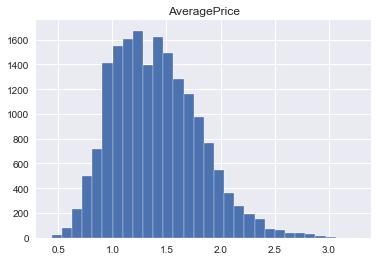

In [34]:
#price looks normally distributed
df.hist(column=['AveragePrice'], bins=30)

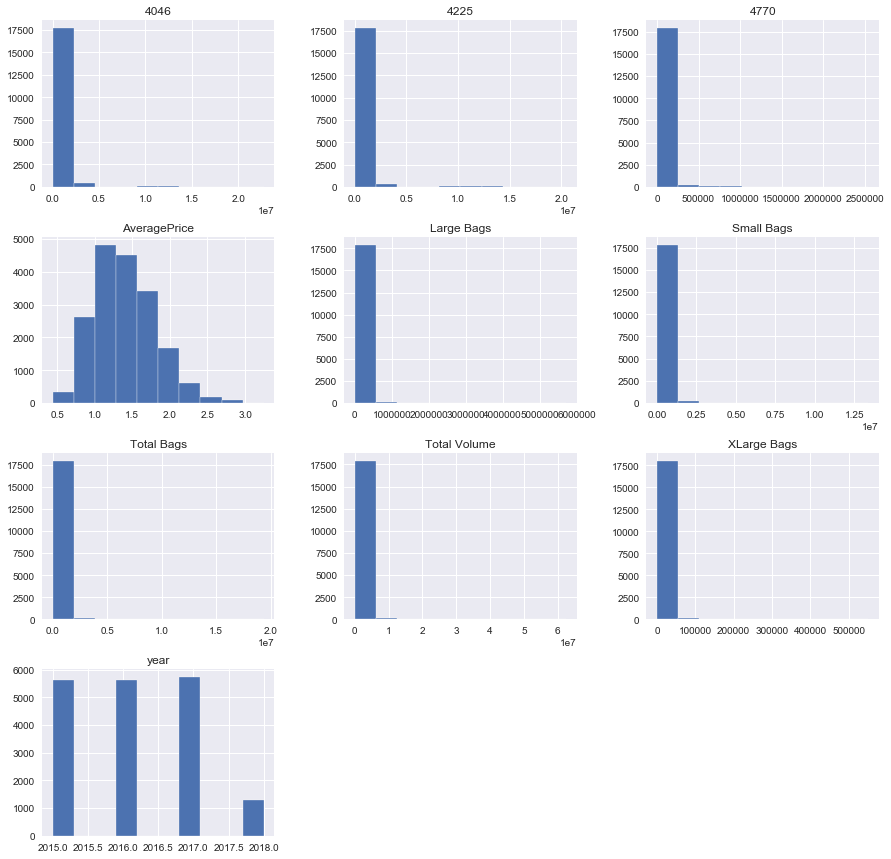

In [35]:
#histograms of the data
df.hist(figsize  = [15, 15]); 

In [36]:
#the data looks somewhat tailed, will probably clean the outliers of the data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


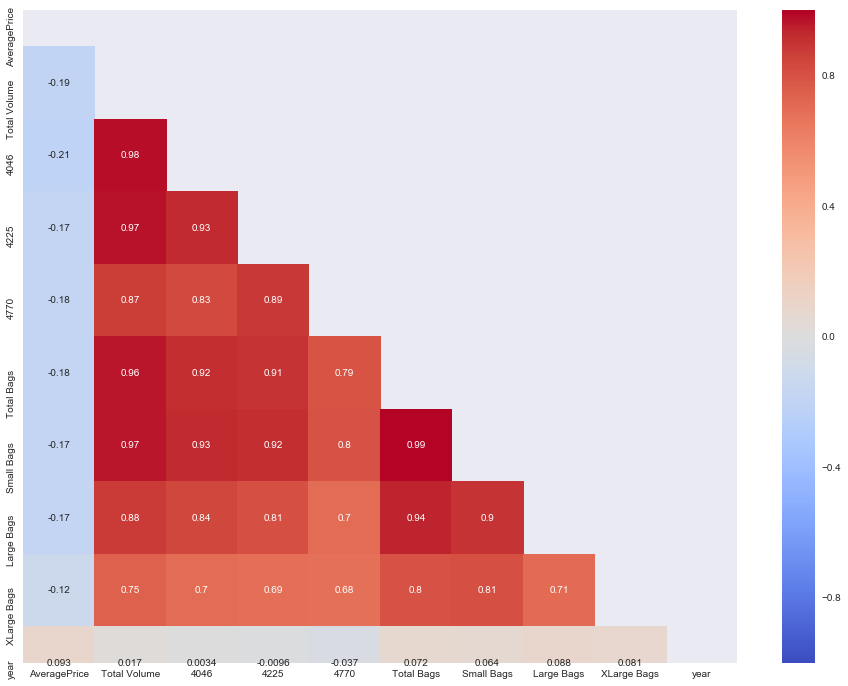

In [37]:
#creating a heatmap, there is definitely a LOT of collinearity in the data which we will have to handle

f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)




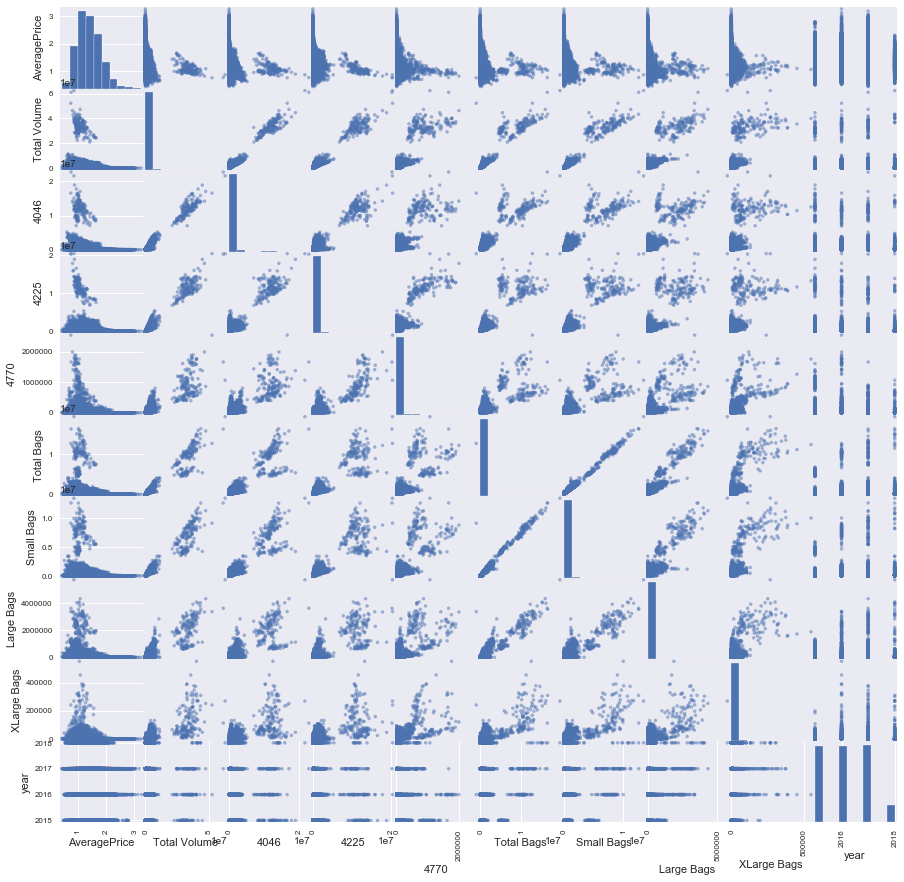

In [19]:
#looking at scatter plots of the dta
pd.plotting.scatter_matrix(df,figsize  = [15, 15]);
plt.show()

In [44]:
df_feat = df.drop(['Total Volume','Total Bags'],axis=1)

In [45]:
df_feat.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


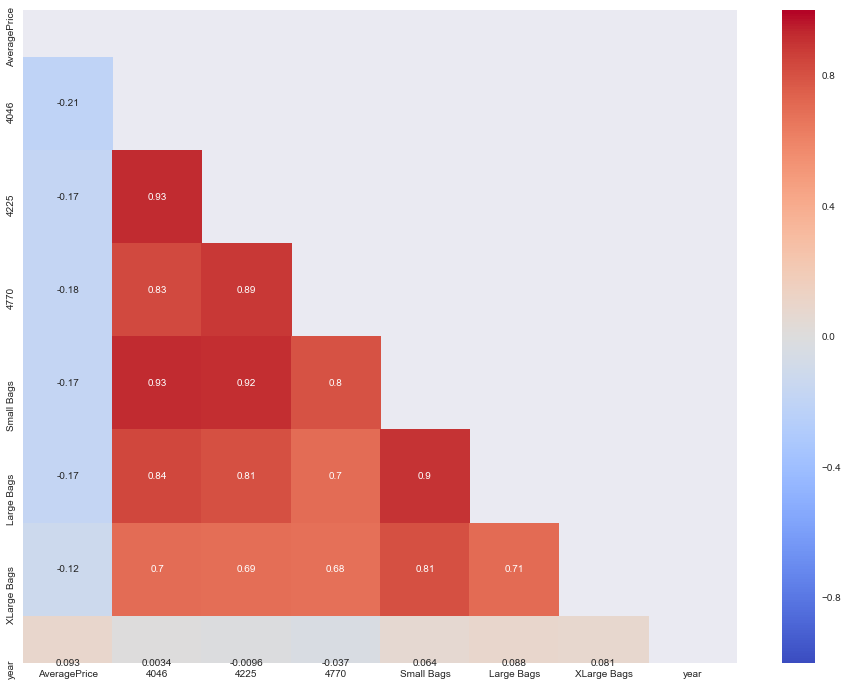

In [46]:
#creating a heatmap, there is definitely a LOT of collinearity in the data which we will have to handle

f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df_feat.corr())
sns.heatmap(df_feat.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)




In [ ]:
a_up = df_feat_polyTEST.price.quantile(.975)
a_low = df_feat_polyTEST.price.quantile(.025)
b_up = df_feat_polyTEST.sqft_living.quantile(.975)
b_low = df_feat_polyTEST.sqft_living.quantile(.025) 
c_up = df_feat_polyTEST.sqft_lot.quantile(.975)
c_low = df_feat_polyTEST.sqft_lot.quantile(.025)
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['price']<a_up]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['price']>a_low]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['sqft_lot']<c_up]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['price']>c_low]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['sqft_living']<b_up]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['price']>b_low]